<a href="https://colab.research.google.com/github/tbeucler/2022_Intro_Python/blob/main/Exercises/W3_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Analyzing Earthquake Data with `Pandas`

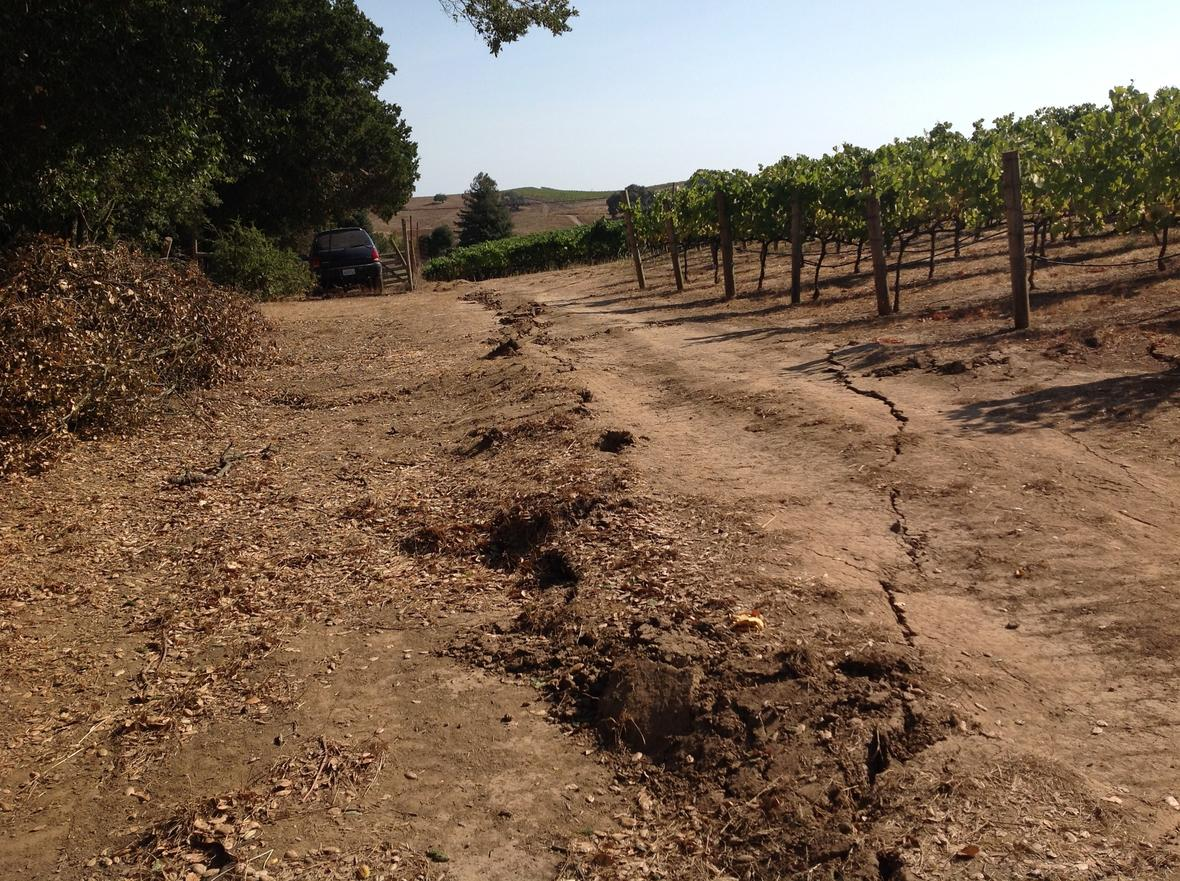

**2014 South Napa CA M6 Earthquake - August 24**

Continuous "mole-track" running parallel to the strike of the fault indicates some E-W compression in addition to [right-lateral faulting](https://www.usgs.gov/faqs/what-fault-and-what-are-different-types). Photo taken near Buhman Rd.

Source: *USGS*

In this assignment, we will review `pandas` fundamentals, such as how to

* Open csv files

* Manipulate dataframe indexes

* Parse date columns

* Examine basic dataframe statistics

* Manipulate text columns and extract values

* Plot dataframe contents using 
<ul type="circle">
<li>Bar charts</li>
<li>Histograms</li>
<li>Scatter plots</li>
</ul>

Data for this assignment in .csv format downloaded from the USGS Earthquakes Database is available at:

https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Efg089STo25Gq6N_BBn_qGoBIsAOd2yUNBgeTfPR2wxw4g?download=1

You don’t need to download this file. You can open it directly with Pandas, with a little help from Pooch (don't worry about reading into the [Pooch documentation](https://www.fatiando.org/pooch/latest/), unless you really want to! 😃).

We'll load the datafile into memory and store the path to the file in the variable `datafile`

In [ ]:
# Pooch Code
import pooch
datafile = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Efg089STo25Gq6N_BBn_qGoBIsAOd2yUNBgeTfPR2wxw4g?download=1', 
                          known_hash='84d455fb96dc8f782fba4b5fbe56cb8970cab678f07c766fcba1b1c4674de1b1')

**Q1) First, import `Numpy`, `Pandas` and `Matplotlib` and (optional) set the display options.**

Hint: Display options are documented [at this link](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)

In [ ]:
# Import all libraries here
import numpy as __
import pandas as __
import matplotlib.pyplot as ___

In [ ]:
#@title Answers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Q2) Use Pandas’ `read_csv` function directly on the datafile to open it as a `DataFrame`**

Hint: Check out the [DataFrame section](#DataFrame)

In [ ]:
# Open the URL as a Pandas' DataFrame
df = pd.read_csv(__)

In [ ]:
# Display first few rows
df.____()

In [ ]:
# Display DataFrame info
df.____()

In [ ]:
#@title Answers
df = pd.read_csv(datafile)
df.head()
#df.info()

In [ ]:
df.info()

The dates were not automatically parsed into `datetime` types!
What can we do?

**Q3) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index**

Hint: Check out the [Reading Data Files example](#Weather)

In [ ]:
# Re-read the URL
df = pd.read_csv(__,__=__)

In [ ]:
# Use the `head` function to check that it worked
df.___()

In [ ]:
# Use the `info` function to check that it worked
df.___()

In [ ]:
#@title Answer
df = pd.read_csv(datafile,parse_dates=[0])
df.info()

**Q4) Use `describe` to get the basic statistics of all the columns**

Hint: The documentation of `describe` is [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:
# Use the `describe` function
___.___()

**Q5) Use `nlargest` to get the top 20 earthquakes by magnitude**

Hint: The documentation of `nlargest` is [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html)

In [ ]:
# Use `nlargest`
df.___(___,___)

Examine the column titled 'place'.
It seems to contain both state and country information. How would you get it out?

**Q6) Extract the state or country using `Pandas` text data functions, and add it as a new column to the `DataFrame`**

Hint 1: The documentation for Pandas' text data functions is [here](https://pandas.pydata.org/pandas-docs/stable/text.html)

Hint 2: The [DataFrame section](#DataFrame) has helpful information

In [ ]:
# Extract the state or country
country = df.__.str.__(',',ex___=True,n=_)

In [ ]:
# Add it as a new column to the `DataFrame` called `country`

In [ ]:
#@title Answer
country = df.place.str.split(',',expand=True,n=1)
df['country'] = country.iloc[:,1]

**Q7) Display each unique value from the new `country` column**

Hint: You may use the `unique` function documented [at this link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

In [ ]:
# Display unique values
df.___.___()

**Q8) Create a filtered dataset that only has earthquakes of magnitude 4 or larger**

Hint: Check out the ["Merging Data" Section](#Merging_Data)

In [ ]:
# Filter the dataset based on the earthquakes' magnitudes

In [ ]:
#@title Answer
df_filt = df[df.mag > 4]

**Q9) Using the filtered dataset (magnitude $\geq$ 4), count the number of earthquakes whose magnitudes >=4 [Num 1], count the number of earthquakes in each country/state [Num 2]. Make a bar chart of Num2 for the top 5 locations with the most earthquakes**

Hint 1: To get Num 1, `Pandas` has a `count` function documented [at this link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html)

Hint 2: Check out the `value_counts` function to get Num 2

Hint 2: Check out the [Plotting Values Section](#Plotting_Values)


In [ ]:
# Count the number of earthquakes whose magnitudes are larger or equal to 4
df_filt.__()
# Count the number of >=4 earthquakes in each country/state
df_filt.__.__()

In [ ]:
#@title Answer
# Count the number of earthquakes whose magnitudes are larger or equal to 4
df_filt.count()
# Count the number of >=4 earthquakes in each country/state
num2 = df_filt.country.value_counts()

In [ ]:
# print the first 5 rows of num2
num2.__[:_]

# convert what you just printed to a DataFrame with 2 columns: 'country' (text) and 'earthquake_num' (number)
# Hint: separate the text and numbers and store them separately in lists
top5_df = pd.DataFrame({'country':list(num2.__[__].__),'earthquake_num':list(num2.__[__]._____)})
top5_df

In [ ]:
# Now plot the numbers in the top5_df dataset with bar chart.
__,__ = plt._______(figsize=(_,_))
top5_df.plot.bar(x=_____,y=_____,rot=0,ax=__)

In [ ]:
#@title Answer
num2.iloc[:5]
top5_df = pd.DataFrame({'country':list(num2.iloc[:5].index),'earthquake_num':list(num2.iloc[:5].values)})
fig,ax = plt.subplots(figsize=(9,4))
top5_df.plot.bar(x='country',y='earthquake_num',rot=0,ax=ax)

**Q10) Make a histogram for the distribution of the earthquakes' magnitudes**

Hint: `Pandas` has a histogram function documented [at this link](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html) and `Matplotlib` has one documented [at this link](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)

In [ ]:
# Make the histogram

In [ ]:
#@title Answer
fig,ax = plt.subplots(figsize=(9,4))
df_filt.mag.hist()
ax.set_xlabel('Magnitude')
ax.set_ylabel('Number')
ax.grid(alpha=0.2,c='b',ls='--')

In [ ]:
# Use a logarithmic scale for y axis

In [ ]:
#@title Answer
fig,ax = plt.subplots(figsize=(9,4))
df_filt.mag.hist()
ax.set_xlabel('Magnitude')
ax.set_ylabel('Number')
ax.grid(alpha=0.2,c='b',ls='--')
ax.set_yscale('log')

In [ ]:
# Make one histogram for the filtered dataset, and one for the unfiltered dataset

In [ ]:
#@title Answer
fig,ax = plt.subplots(1,2,figsize=(12,4))
df_filt.mag.hist(ax=ax[0],color='#1f77b4')
ax[0].set_xlabel('Magnitude')
ax[0].set_ylabel('Number')
ax[0].grid(alpha=0.2,c='b',ls='--')
ax[0].set_title('Filtered')

df.mag.hist(ax=ax[1],color='#ff7f0e')
ax[1].set_xlabel('Magnitude')
ax[1].set_ylabel('')
ax[1].grid(alpha=0.2,c='b',ls='--')
ax[1].set_title('Unfiltered')
plt.show()

**Q11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude**

Hint: Consider reading the documentation for [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to make the scatter plot and that of [`plt.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) to color the points by magnitude. 

In [ ]:
# You can use a two-column subplot with 
# both the filtered/unfiltered datasets
# to facilitate their comparison.
__,__ = plt.subplots(_,_,_______=(__,__))
# Filtered data
_____.plot.scatter(x=______,y=_______,c=____,ax=____,cmap=____,vmin=0,vmax=8)
# Unfilted data
df.plot.scatter(x=______,y=_______,c=____,ax=____,cmap=____,vmin=0,vmax=8)
ax[0].set_title('Filtered')
ax[1].set_title('Unfiltered')
plt.show()

In [ ]:
#@title Answers
fig,ax = plt.subplots(1,2,figsize=(18,4))
df_filt.plot.scatter(x='longitude',y='latitude',c='mag',ax=ax[0],cmap='Reds',vmin=0,vmax=8)
df.plot.scatter(x='longitude',y='latitude',c='mag',ax=ax[1],cmap='Reds',vmin=0,vmax=8)
ax[0].set_title('Filtered')
ax[1].set_title('Unfiltered')
plt.show()

Do you notice a difference between filtered and unfiltered datasets?